Version 2025.01.16 - A. Lundervold

(Modified from [TabPFN Demo V1 Local](https://colab.research.google.com/drive/1SHa43VuHASLjevzO7y3-wPCxHY18-2H6?usp=sharing), using `bmed365-cuda` conda environment or Google Colab)

[![Google Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/MMIV-ML/ELMED219-2025/blob/main/Lab2-DL/notebooks/07-TabPFN-neuro.ipynb)

## TabPFN: A Revolutionary Approach to Analyzing Small Medical Datasets using Deep Learning

### Key Points for Medical Students

#### What is TabPFN?
- A new machine learning model specifically designed for analyzing small-to-medium sized tabular datasets (up to 10,000 samples)
- Particularly relevant for medical research where large datasets are often unavailable
- Outperforms traditional methods like XGBoost and CatBoost with significantly less training time

#### Why is it Important for Medicine?
1. **Speed and Efficiency**
   - Can analyze data in seconds rather than hours
   - No need for extensive hyperparameter tuning
   - Perfect for rapid clinical research and analysis

2. **Small Dataset Capability**
   - Excels with limited data (common in medical research)
   - Maintains high accuracy even with small sample sizes
   - Particularly useful for rare disease studies or pilot research

3. **Key Features Relevant to Medical Research**
   - Handles missing data effectively
   - Works well with both categorical and numerical data
   - Built-in uncertainty estimation
   - Can detect outliers and anomalies
   - Provides interpretable results

#### Practical Applications in Medicine
1. **Clinical Decision Support**
   - Risk prediction models
   - Patient outcome prediction
   - Treatment response analysis

2. **Medical Research**
   - Biomedical risk models
   - Drug discovery
   - Clinical trial data analysis
   - Patient stratification

3. **Data Analysis**
   - Handles common medical data challenges
   - Works with mixed data types (lab values, patient demographics, etc.)
   - Can process both structured and categorical medical data

#### Advantages Over Traditional Methods
- Faster analysis (2.8s vs. 4 hours for traditional methods)
- Better performance on small datasets
- More robust to missing data
- Built-in uncertainty estimation
- No need for extensive data preprocessing



### Traditional Deep Learning vs TabPFN's Approach

#### Traditional Challenges
- Deep learning has historically struggled with tabular data
- Neural networks typically perform poorly compared to tree-based methods (like XGBoost)
- Usually requires large datasets to be effective

#### TabPFN's Novel Solution
1. **Innovative Architecture**
   - Uses a modified transformer architecture
   - Specifically designed for tabular data
   - Treats each cell in the table as a separate representation
   - Combines feature and sample attention mechanisms

2. **Pre-training Strategy**
   - Pre-trained on millions of synthetic datasets
   - Uses in-context learning (ICL), similar to large language models
   - Learns to understand relationships in tabular data
   - No need for traditional gradient-based training on new datasets

### Key Deep Learning Components

#### Architecture Details
- Two-way attention mechanism:
  - Attention across features in each row
  - Attention across samples for each feature
- Memory-efficient design
- Optimized for small-to-medium datasets
- Can handle up to 10,000 samples and 500 features

#### Training Innovation
1. **Synthetic Data Training**
   - Trained on ~130 million synthetic datasets
   - Uses structural causal models
   - Learns general patterns and relationships
   - No need for real-world data in pre-training

2. **In-Context Learning**
   - Similar to modern language models
   - Can adapt to new datasets without traditional training
   - Single forward pass prediction
   - No fine-tuning required for new tasks

### Advantages Over Traditional Deep Learning

1. **Performance**
   - Better results than standard neural networks
   - Competitive with or superior to tree-based methods
   - Works well with limited data

2. **Efficiency**
   - No need for dataset-specific training
   - Fast inference time
   - Lower computational requirements
   - GPU acceleration optional but not required

3. **Practicality**
   - Handles missing values automatically
   - Works with mixed data types
   - Built-in uncertainty estimation
   - More interpretable than traditional deep learning

### Impact
This approach represents a significant shift in how deep learning can be applied to tabular data, making it more practical and effective for real-world applications, particularly in fields like healthcare where data is often limited but structured.

## TabPFN in neurology and neuroscience

Welcome to the hands-on Colab notebook for TabPFN!
This code shows how to locally (with GPU support) install and run TabPFN. For fast inference with additional features use **[TabPFN client](https://tinyurl.com/tabpfn-colab-online)**.

**Installation**
* First, copy the notebook to be able to modify it.
* Then, run the cells in the installation block, this should
be good enough!

---

> 🔵 **Hint** <br>
We recommend first enabling the **Table of Contents** with the `☰` icon in the top left and collapsing all sections by selecting all cells `Ctrl + Shift + A` and then pressing `Ctrl + ]`.

---

Thank you to [Lennart Purucker](https://github.com/LennartPurucker) for providing the original version of this notebook!

In [1]:
# This is a quick check of whether the notebook is currently running on Google Colaboratory
# as that makes some difference for the code below.
# We'll do this in every notebook of the course.

try:
    import google.colab
    # If this statement executes without error, you're in a Colab environment.
    is_colab = True
    print("Running in Google Colab.")
except ImportError:
    # An ImportError means you're not in a Colab environment.
    is_colab = False
    print("Not running in Google Colab.")

Not running in Google Colab.


# Installation

Restart your runtime and rerun the *cell*, if Colab asks for it.

In [2]:
if is_colab:
    # Install sklearn
    #!pip install scikit-learn==1.5.2

    # Install TorchGeometric
    !pip install torch-geometric

    # Install TabPFN
    !pip install tabpfn

    # TabPFN Extensions installs optional functionalities around the TabPFN model
    # These include post-hoc ensembles, interpretability tools, and more
    !git clone https://github.com/PriorLabs/tabpfn-extensions
    !pip install -e tabpfn-extensions
    !pip install tabpfn-extensions

    # Install hyperopt library for hyperparameter optimization
    !pip install hyperopt

    # Install Baselines
    !pip install catboost xgboost

    # Install example datasets
    !pip install datasets

    # UC Irvine Machine Learning Repository
    !pip install ucimlrepo
    
else:
    print("This code is not running in Colab.")


This code is not running in Colab.


**Now Restart the Runtime**

### Necessary Imports for the Notebook

The examples in this notebook require the following imports.
Make sure to run this cell before any other cell.




#### In order to get the fastest predictions you need to enable GPUs for the notebook:
* Navigate to Edit→Notebook Settings
* select GPU from the Hardware Accelerator drop-down

In [3]:
import os
import requests
from io import StringIO
from urllib.error import URLError  # Add this import

# Setup Imports
import pandas as pd
import numpy as np

from sklearn.datasets import load_breast_cancer, load_diabetes, load_iris
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import (
    accuracy_score,
    mean_absolute_error,
    mean_squared_error,
    root_mean_squared_error,
    r2_score,
    roc_auc_score,
)
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.inspection import DecisionBoundaryDisplay

from sklearn.datasets import fetch_openml
from sklearn.preprocessing import LabelEncoder
from IPython.display import display, Markdown, Latex

# Baseline Imports
from xgboost import XGBClassifier, XGBRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from catboost import CatBoostClassifier, CatBoostRegressor

import torch
import torch_geometric
import shap

from tabpfn import TabPFNClassifier, TabPFNRegressor

if not torch.cuda.is_available():
    raise SystemError('GPU device not found. For fast training, please enable GPU. See section above for instructions.')

In [4]:
print("torch:", torch.__version__)
print("torch_geometric:", torch_geometric.__version__)
print("shap:", shap.__version__)
print("torch.cuda.is_available():", torch.cuda.is_available())
print("torch.cuda.get_device_name(0):", torch.cuda.get_device_name(0))
print("torch.cuda.get_device_properties(0):", torch.cuda.get_device_properties(0))

torch: 2.5.1
torch_geometric: 2.6.1
shap: 0.46.0
torch.cuda.is_available(): True
torch.cuda.get_device_name(0): NVIDIA RTX A5000 Laptop GPU
torch.cuda.get_device_properties(0): _CudaDeviceProperties(name='NVIDIA RTX A5000 Laptop GPU', major=8, minor=6, total_memory=16116MB, multi_processor_count=48, uuid=f78ec681-cecf-19d1-6cf7-0ac2e2802823, L2_cache_size=4MB)


# Predicting with TabPFN

We now compare the classification performance of TabPFN, [XGBoost](https://xgboost.readthedocs.io/en/stable/), and [CatBoost](https://catboost.ai/) on some [toy data from scikit-learn](https://scikit-learn.org/stable/datasets/toy_dataset.html) and data from neuroscience.

We measure classification performance using [ROC AUC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html) (see [[ROC curve](https://en.wikipedia.org/wiki/Receiver_operating_characteristic)]), and other metrics.

### Prediction of ...

- Oxford Parkinson's Disease Telemonitoring Dataset  https://archive.ics.uci.edu/dataset/189/parkinsons+telemonitoring (Regression)
- The DARWIN dataset includes handwriting data from 174 participants. The classification task consists in distinguishing Alzheimer’s disease patients from healthy people. (https://archive.ics.uci.edu/dataset/732/darwin  )
- Glioma Grading Clinical and Mutation Features (https://archive.ics.uci.edu/dataset/759/glioma+grading+clinical+and+mutation+features+dataset  )

### DARWIN dataset

The **DARWIN dataset** includes handwriting data from 174 participants. The classification task consists in distinguishing Alzheimer’s disease patients from healthy people.

Dataset Characteristics: Tabular

Subject Area: Health and Medicine

Associated Tasks: Classification

Feature Type-

\# Instances: 174

\# Features: 451

N. D. Cilia, G. De Gregorio, C. De Stefano, F. Fontanella, A. Marcelli, A. Parziale, Diagnosing Alzheimer’s disease from online handwriting: A novel dataset and performance benchmarking, Engineering Applications of Artificial Intelligence, Vol. 111 (2022) 104822. https://doi.org/10.1016/j.engappai.2022.104822

In [5]:
# !pip install ucimlrepo

In [6]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
darwin = fetch_ucirepo(id=732) 
  
# data (as pandas dataframes) 
X = darwin.data.features 
y = darwin.data.targets 
  
# metadata as pandas dataframe
# Convert metadata to a more manageable format
metadata_dict = {}
for key, value in darwin.metadata.items():
    # Handle potential nested structures
    if isinstance(value, (list, dict)):
        metadata_dict[key] = str(value)  # Convert complex objects to string
    else:
        metadata_dict[key] = value

# Create DataFrame with a single row
metadata_df = pd.DataFrame([metadata_dict])

# Display the transposed DataFrame for better readability
print("\nDataset Metadata:")
print(metadata_df.T)

# Also display the variable information
print("\nVariable Information:")
pd.DataFrame(darwin.variables)




Dataset Metadata:
                                                                          0
uci_id                                                                  732
name                                                                 DARWIN
repository_url               https://archive.ics.uci.edu/dataset/732/darwin
data_url                  https://archive.ics.uci.edu/static/public/732/...
abstract                  The DARWIN dataset includes handwriting data f...
area                                                    Health and Medicine
tasks                                                    ['Classification']
characteristics                                                 ['Tabular']
num_instances                                                           174
num_features                                                            451
feature_types                                                            []
demographics                                                         

,name,role,type,demographic,description,units,missing_values
0,ID,Feature,Categorical,None,None,None,no
1,air_time1,Feature,Integer,None,None,None,no
2,disp_index1,Feature,Categorical,None,None,None,no
3,gmrt_in_air1,Feature,Continuous,None,None,None,no
4,gmrt_on_paper1,Feature,Continuous,None,None,None,no
...,...,...,...,...,...,...,...
447,paper_time25,Feature,Integer,None,None,None,no
448,pressure_mean25,Feature,Continuous,None,None,None,no
449,pressure_var25,Feature,Continuous,None,None,None,no
450,total_time25,Feature,Integer,None,None,None,no


In [7]:
# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
        X, y, 
        test_size=0.2, 
        random_state=42,
        stratify=y
)
    
print("\nData split complete:")
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")
# Number of classes in train and test set
print(f"Number of classes in train set: {len(np.unique(y_train))}")
print(f"Number of classes in test set: {len(np.unique(y_test))}")
# Distribution of classes in train and test set
print(f"Class distribution in train set: {y_train.value_counts()}")
print(f"Class distribution in test set: {y_test.value_counts()}")



Data split complete:
Training set shape: (139, 451)
Test set shape: (35, 451)
Number of classes in train set: 2
Number of classes in test set: 2
Class distribution in train set: class
P        71
H        68
Name: count, dtype: int64
Class distribution in test set: class
P        18
H        17
Name: count, dtype: int64


In [8]:
print("\nString columns:")
print(X.select_dtypes(include=['object']).columns)


String columns:
Index(['ID'], dtype='object')


In [9]:
%%time
# Train and evaluate TabPFN
classifier = TabPFNClassifier(random_state=42, device='cuda') # , ignore_pretraining_limits=True) if more that 500 samples
classifier.fit(X_train, y_train)
y_pred = classifier.predict_proba(X_test)

# Calculate ROC AUC with multiclass handling
if len(np.unique(y)) > 2:
    # For multiclass ROC AUC, use 'ovr' (one-vs-rest) approach
    score = roc_auc_score(y_test, y_pred, multi_class='ovr', average='macro')
else:
    # For binary classification
    score = roc_auc_score(y_test, y_pred[:, 1])

print(f"TabPFN ROC AUC: {score:.4f}")

# Also print accuracy for easier interpretation when using multiclass
accuracy = accuracy_score(y_test, classifier.predict(X_test))
print(f"TabPFN Accuracy: {accuracy:.4f}")

# Print confusion matrix
from sklearn.metrics import confusion_matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, classifier.predict(X_test)))

/home/arvid/anaconda3/envs/bmed365-cuda/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


TabPFN ROC AUC: 0.8529
TabPFN Accuracy: 0.6571

Confusion Matrix:
[[14  3]
 [ 9  9]]
CPU times: user 4.41 s, sys: 2.62 s, total: 7.03 s
Wall time: 2.82 s


In [11]:
# Compare different machine learning models by training each one multiple times
# on different parts of the data and averaging their performance scores for a
# more reliable performance estimate


# Assuming X is your feature DataFrame and y is your target
# First, let's check the data types
print("Data types in X:")
print(X.dtypes)

# Remove or encode string columns
# Option 1: Remove string columns
X_numeric = X.select_dtypes(include=[np.number])

# Option 2: Encode string columns
# X_encoded = X.copy()
# for column in X.select_dtypes(include=['object']):
#     le = LabelEncoder()
#     X_encoded[column] = le.fit_transform(X_encoded[column])

# Encode target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y) 
# Now try the cross validation with numeric data
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'TabPFN': TabPFNClassifier(random_state=42,device='cuda'),
    'XGBoost': XGBClassifier(random_state=42),
    'CatBoost': CatBoostClassifier(random_state=42, verbose=0)
}

# Calculate scores
scoring = 'roc_auc_ovr' if len(np.unique(y)) > 2 else 'roc_auc'
scores = {name: cross_val_score(model, X_numeric, y_encoded, cv=5, scoring=scoring, n_jobs=-1, verbose=1).mean()
          for name, model in models.items()}

# Plot results
df = pd.DataFrame(list(scores.items()), columns=['Model', 'ROC AUC'])
print("\nCross-validation results:")
df

Data types in X:
ID                   object
air_time1             int64
disp_index1         float64
gmrt_in_air1        float64
gmrt_on_paper1      float64
                     ...   
num_of_pendown25      int64
paper_time25          int64
pressure_mean25     float64
pressure_var25      float64
total_time25          int64
Length: 451, dtype: object


/home/arvid/anaconda3/envs/bmed365-cuda/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.



Cross-validation results:


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   56.1s finished


,Model,ROC AUC
0,Random Forest,0.876740
1,TabPFN,0.900000
2,XGBoost,0.880546
3,CatBoost,0.908304


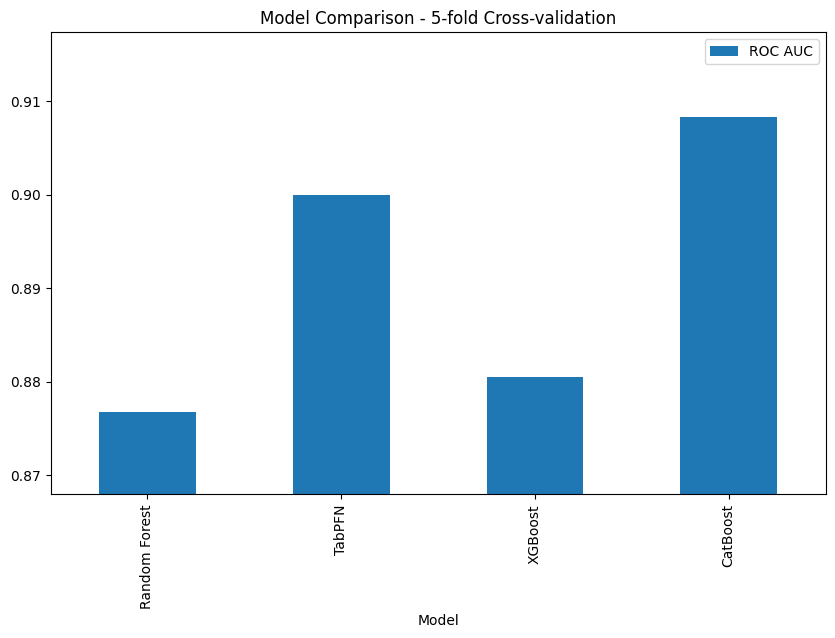

In [12]:
# Plot results
df = pd.DataFrame(list(scores.items()), columns=['Model', 'ROC AUC'])
ax = df.plot(x='Model', y='ROC AUC', kind='bar', figsize=(10, 6))
ax.set_ylim(df['ROC AUC'].min() * 0.99, df['ROC AUC'].max() * 1.01)
ax.set_title('Model Comparison - 5-fold Cross-validation')

plt.show()

### Glioma Grading Clinical and Mutation Features

https://github.com/uci-ml-repo/ucimlrepo

Gliomas are the most common primary tumors of the brain. They can be graded as LGG (Lower-Grade Glioma) or GBM (Glioblastoma Multiforme) depending on the histological/imaging criteria. Clinical and molecular/mutation factors are also very crucial for the grading process. Molecular tests are expensive to help accurately diagnose glioma patients.  The instances represent the records of patients who have brain glioma. The dataset was  constructed based on TCGA-LGG and TCGA-GBM brain glioma projects.

In this dataset, the most frequently mutated 20 genes and 3 clinical features are considered from TCGA-LGG and TCGA-GBM brain glioma projects. .

Each record is characterized by 20 molecular features (each of which can be mutated or not_mutated (wildtype) depending on the TCGA Case_ID) and 3 clinical features (concerning the demographics of the patient).

The prediction task is to determine whether a patient is LGG or GBM with a given clinical and molecular/mutation features. The main objective is to find the optimal subset of mutation genes and clinical features for the glioma grading process to improve performance and reduce costs.

**Are there recommended data splits?**

No. We suggest 10-fold cross-validation for feature selection, classification etc.

**Does the dataset contain data that might be considered sensitive in any way?**

There is information about race, age, and gender of the patient.

**Was there any data preprocessing performed?**

Yes. 

The original and preprocessed files differ in the following ways:
- There are 23 instances in the original file where Gender, Age_at_diagnosis, or Race feature values are ‘--’, or ‘not reported’. These instances were filtered out in the preprocessed dataset.
- Despite being present in the original dataset, we do not include the columns Project, Case_ID, and Primary_Diagnosis columns in the preprocessed dataset.
- Age_at_diagnosis feature values were converted from string to continuous value by adding day information to the corresponding year information in the dataset as a floating-point number for the preprocessing stage.

All processed and unprocessed files also exist in this directory. 

Below is a list of the additional columns of the original dataset file (and their corresponding description):
- Project column represents corresponding TCGA-LGG or TCGA-GBM project names.
- Case_ID column refers to the related project Case_ID information.
- Primary_Diagnosis column provides information related to the type of primary diagnosis. 

**Has Missing Values?**

No

**Dataset Characteristics:** Tabular, Multivariate

**Subject Area:** Health and Medicine

**Associated Tasks:** Classification, Other

**Feature Type:** Real, Categorical, Integer

**\# Instances:** 839

**\# Features:** 23

E. Tasci, K. Camphausen, A. Krauze, and Y. Zhuge. "Glioma Grading Clinical and Mutation Features," UCI Machine Learning Repository, 2022. [Online]. Available: https://doi.org/10.24432/C5R62J.

In [13]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
glioma_grading_clinical_and_mutation_features = fetch_ucirepo(id=759) 
  
# data (as pandas dataframes) 
X = glioma_grading_clinical_and_mutation_features.data.features 
y = glioma_grading_clinical_and_mutation_features.data.targets 

  
# metadata as pandas dataframe
# Convert metadata to a more manageable format
metadata_dict = {}
for key, value in glioma_grading_clinical_and_mutation_features.metadata.items():
    # Handle potential nested structures
    if isinstance(value, (list, dict)):
        metadata_dict[key] = str(value)  # Convert complex objects to string
    else:
        metadata_dict[key] = value

# Create DataFrame with a single row
metadata_df = pd.DataFrame([metadata_dict])

# Display the transposed DataFrame for better readability
print("\nDataset Metadata:")
print(metadata_df.T)

# Also display the variable information
print("\nVariable Information:")
pd.DataFrame(glioma_grading_clinical_and_mutation_features.variables)
# metadata 
print(glioma_grading_clinical_and_mutation_features.metadata) 
  
# variable information 
glioma_grading_clinical_and_mutation_features.variables 


Dataset Metadata:
                                                                          0
uci_id                                                                  759
name                          Glioma Grading Clinical and Mutation Features
repository_url            https://archive.ics.uci.edu/dataset/759/glioma...
data_url                  https://archive.ics.uci.edu/static/public/759/...
abstract                  Gliomas are the most common primary tumors of ...
area                                                    Health and Medicine
tasks                                           ['Classification', 'Other']
characteristics                                 ['Tabular', 'Multivariate']
num_instances                                                           839
num_features                                                             23
feature_types                            ['Real', 'Categorical', 'Integer']
demographics                                      ['Gender', 'Age', '

,name,role,type,demographic,description,units,missing_values
0,Grade,Target,Categorical,None,"Glioma grade class information (0 = ""LGG""; 1 =...",N/A,no
1,Gender,Feature,Categorical,Gender,"Gender (0 = ""male""; 1 = ""female"")",N/A,no
2,Age_at_diagnosis,Feature,Continuous,Age,Age at diagnosis with the calculated number of...,years,no
3,Race,Feature,Categorical,Race,"Race (0 = ""white""; 1 = ""black or african Ame...",N/A,no
4,IDH1,Feature,Categorical,None,isocitrate dehydrogenase (NADP(+))1 (0 = NOT_M...,N/A,no
5,TP53,Feature,Categorical,None,tumor protein p53 (0 = NOT_MUTATED; 1 = MUTATED),N/A,no
6,ATRX,Feature,Categorical,None,ATRX chromatin remodeler (0 = NOT_MUTATED; 1 =...,N/A,no
7,PTEN,Feature,Categorical,None,phosphatase and tensin homolog (0 = NOT_MUTATE...,N/A,no
8,EGFR,Feature,Categorical,None,epidermal growth factor receptor (0 = NOT_MUTA...,N/A,no
9,CIC,Feature,Categorical,None,capicua transcriptional repressor (0 = NOT_MUT...,N/A,no


In [28]:
print("\nString columns:")
print(X.select_dtypes(include=['object']).columns)


String columns:
Index(['Race'], dtype='object')


In [42]:
X_numeric = X.drop(columns=['Race'])

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
        X_numeric, y, 
        test_size=0.2, 
        random_state=42,
        stratify=y
)
    
print("\nData split complete:")
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")
# Number of classes in train and test set
print(f"Number of classes in train set: {len(np.unique(y_train))}")
print(f"Number of classes in test set: {len(np.unique(y_test))}")
# Distribution of classes in train and test set
print(f"Class distribution in train set: {y_train.value_counts()}")
print(f"Class distribution in test set: {y_test.value_counts()}")



Data split complete:
Training set shape: (671, 22)
Test set shape: (168, 22)
Number of classes in train set: 2
Number of classes in test set: 2
Class distribution in train set: Grade
0        389
1        282
Name: count, dtype: int64
Class distribution in test set: Grade
0        98
1        70
Name: count, dtype: int64


In [32]:
%%time
# Train and evaluate TabPFN
classifier = TabPFNClassifier(random_state=42, device='cuda') # , ignore_pretraining_limits=True) if more that 500 samples
classifier.fit(X_train, y_train)
y_pred = classifier.predict_proba(X_test)

# Calculate ROC AUC with multiclass handling
if len(np.unique(y)) > 2:
    # For multiclass ROC AUC, use 'ovr' (one-vs-rest) approach
    score = roc_auc_score(y_test, y_pred, multi_class='ovr', average='macro')
else:
    # For binary classification
    score = roc_auc_score(y_test, y_pred[:, 1])

print(f"TabPFN ROC AUC: {score:.4f}")

# Also print accuracy for easier interpretation when using multiclass
accuracy = accuracy_score(y_test, classifier.predict(X_test))
print(f"TabPFN Accuracy: {accuracy:.4f}")

# Print confusion matrix
from sklearn.metrics import confusion_matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, classifier.predict(X_test)))

/home/arvid/anaconda3/envs/bmed365-cuda/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


TabPFN ROC AUC: 0.9303
TabPFN Accuracy: 0.8571

Confusion Matrix:
[[80 18]
 [ 6 64]]
CPU times: user 1.12 s, sys: 1.46 s, total: 2.58 s
Wall time: 555 ms


In [33]:
# Compare different machine learning models by training each one multiple times
# on different parts of the data and averaging their performance scores for a
# more reliable performance estimate


# Assuming X is your feature DataFrame and y is your target
# First, let's check the data types
print("Data types in X_numeric:")
print(X_numeric.dtypes)

# Remove or encode string columns
# Option 1: Remove string columns
#X_numeric = X.select_dtypes(include=[np.number])

# Option 2: Encode string columns
# X_encoded = X.copy()
# for column in X.select_dtypes(include=['object']):
#     le = LabelEncoder()
#     X_encoded[column] = le.fit_transform(X_encoded[column])

# Encode target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)
# Now try the cross validation with numeric data
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'TabPFN': TabPFNClassifier(random_state=42), #,device='cuda'),
    'XGBoost': XGBClassifier(random_state=42),
    'CatBoost': CatBoostClassifier(random_state=42, verbose=0)
}

# Calculate scores
scoring = 'roc_auc_ovr' if len(np.unique(y)) > 2 else 'roc_auc'
scores = {name: cross_val_score(model, X_numeric, y_encoded, cv=5, scoring=scoring, n_jobs=-1, verbose=1).mean()
          for name, model in models.items()}

# Plot results
df = pd.DataFrame(list(scores.items()), columns=['Model', 'ROC AUC'])
print("\nCross-validation results:")
df

Data types in X_numeric:
Gender                int64
Age_at_diagnosis    float64
IDH1                  int64
TP53                  int64
ATRX                  int64
PTEN                  int64
EGFR                  int64
CIC                   int64
MUC16                 int64
PIK3CA                int64
NF1                   int64
PIK3R1                int64
FUBP1                 int64
RB1                   int64
NOTCH1                int64
BCOR                  int64
CSMD3                 int64
SMARCA4               int64
GRIN2A                int64
IDH2                  int64
FAT4                  int64
PDGFRA                int64
dtype: object


/home/arvid/anaconda3/envs/bmed365-cuda/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.



Cross-validation results:


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.0s finished


,Model,ROC AUC
0,Random Forest,0.896077
1,TabPFN,0.920572
2,XGBoost,0.901755
3,CatBoost,0.916546


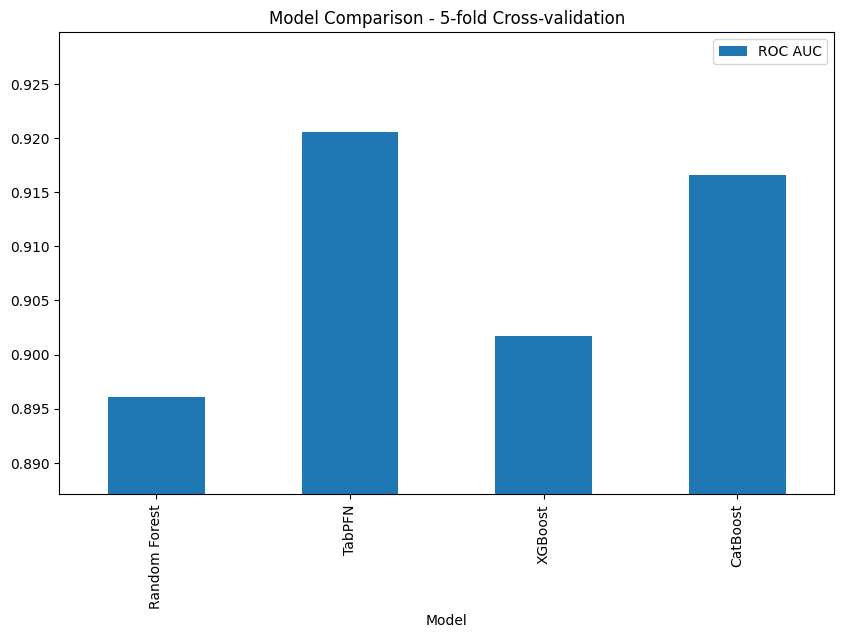

In [34]:
# Plot results
df = pd.DataFrame(list(scores.items()), columns=['Model', 'ROC AUC'])
ax = df.plot(x='Model', y='ROC AUC', kind='bar', figsize=(10, 6))
ax.set_ylim(df['ROC AUC'].min() * 0.99, df['ROC AUC'].max() * 1.01)
ax.set_title('Model Comparison - 5-fold Cross-validation')

plt.show()

In [44]:
list(X_numeric.columns)

['Gender',
 'Age_at_diagnosis',
 'IDH1',
 'TP53',
 'ATRX',
 'PTEN',
 'EGFR',
 'CIC',
 'MUC16',
 'PIK3CA',
 'NF1',
 'PIK3R1',
 'FUBP1',
 'RB1',
 'NOTCH1',
 'BCOR',
 'CSMD3',
 'SMARCA4',
 'GRIN2A',
 'IDH2',
 'FAT4',
 'PDGFRA']

In [45]:
y

,Grade
0,0
1,0
2,0
3,0
4,0
...,...
834,1
835,1
836,1
837,1


Initial checks:
Number of features in X: 22
Length of feature_names: 22
['Gender', 'Age_at_diagnosis', 'IDH1', 'TP53', 'ATRX', 'PTEN', 'EGFR', 'CIC', 'MUC16', 'PIK3CA', 'NF1', 'PIK3R1', 'FUBP1', 'RB1', 'NOTCH1', 'BCOR', 'CSMD3', 'SMARCA4', 'GRIN2A', 'IDH2', 'FAT4', 'PDGFRA']


/home/arvid/anaconda3/envs/bmed365-cuda/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


  0%|          | 0/5 [00:00<?, ?it/s]


SHAP values info:
SHAP values shape: (5, 22, 2)
Feature importance length: 44


Top 10 Most Important Features:
   Feature  Importance
5     PTEN    0.264911
4     ATRX    0.264911
3     TP53    0.101127
2     IDH1    0.101127
6     EGFR    0.048795
7      CIC    0.048795
15    BCOR    0.033490
14  NOTCH1    0.033490
9   PIK3CA    0.026630
8    MUC16    0.026630


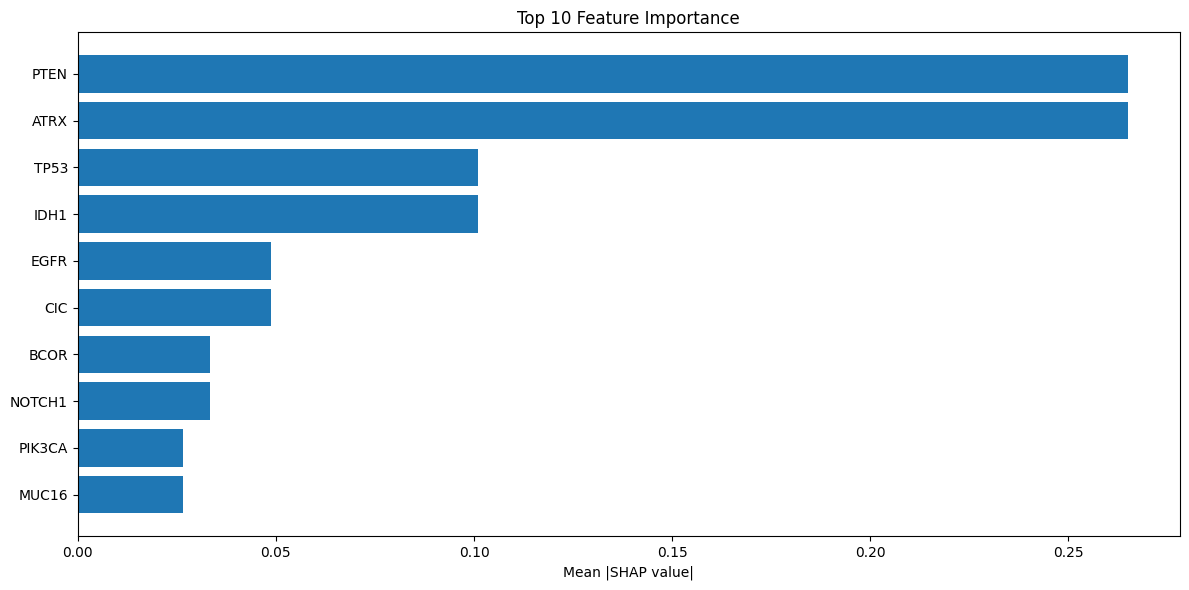

In [48]:
# Diagnostic version

import numpy as np
import pandas as pd
from tabpfn import TabPFNClassifier
import shap
import matplotlib.pyplot as plt

feature_names = list(X_train.columns)

# Debug prints
print("Initial checks:")
print(f"Number of features in X: {X_train.shape[1]}")
print(f"Length of feature_names: {len(feature_names)}")

print(list(X_train.columns))


# Train model and calculate SHAP values
clf = TabPFNClassifier(device='cuda', random_state=42)
clf.fit(X_train, y_train)

# Calculate SHAP values
n_samples = 5
background = shap.kmeans(X_train, 10)
explainer = shap.KernelExplainer(clf.predict_proba, background)
shap_values = explainer.shap_values(X_test[:n_samples])

# Debug prints for SHAP values
print("\nSHAP values info:")
if isinstance(shap_values, list):
    print(f"SHAP values shape (class 1): {shap_values[1].shape}")
    feature_importance = np.abs(shap_values[1]).mean(0)
else:
    print(f"SHAP values shape: {shap_values.shape}")
    feature_importance = np.abs(shap_values).mean(0)

# Ensure one-dimensional
feature_importance = np.ravel(feature_importance)
print(f"Feature importance length: {len(feature_importance)}")

# Create lists of equal length
n_features = len(feature_importance)
if len(feature_names) != n_features:
    print(f"\nWarning: Feature names length ({len(feature_names)}) doesn't match feature importance length ({n_features})")
    #feature_names = [f"Feature_{i}" for i in range(n_features)]
    #feature_names = list(X_train.columns)

# Create DataFrame using zip
importance_data = list(zip(feature_names, feature_importance))
importance_df = pd.DataFrame(importance_data, columns=['Feature', 'Importance'])
importance_df = importance_df.sort_values('Importance', ascending=False)

# Display results
print("\nTop 10 Most Important Features:")
print(importance_df.head(10))

# Plot
plt.figure(figsize=(12, 6))
top_10 = importance_df.head(10)
plt.barh(top_10['Feature'][::-1], top_10['Importance'][::-1])
plt.title('Top 10 Feature Importance')
plt.xlabel('Mean |SHAP value|')
plt.tight_layout()
plt.show()

In [49]:
# Simplified approach using only summary_plot
import shap

# Train model
clf = TabPFNClassifier(random_state=42) #,device='cuda'
clf.fit(X_train, y_train)

# Calculate SHAP values
background = shap.sample(X_train, 100)
explainer = shap.KernelExplainer(clf.predict_proba, background)
shap_values = explainer.shap_values(X_test[:5])



/home/arvid/anaconda3/envs/bmed365-cuda/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


  0%|          | 0/5 [00:00<?, ?it/s]

In [50]:
# Print SHAP values for individual predictions
print("\nSHAP values for first few predictions:")
for i in range(min(5, n_samples)):  # Show first 3 samples
    print(f"\nSample {i+1}:")
    sample_importance = pd.DataFrame({
        'Feature': feature_names,
        'SHAP value': shap_values[1][i, 0]  # Values for positive class
    }).sort_values('SHAP value', key=abs, ascending=False)
    print(sample_importance.head())


SHAP values for first few predictions:

Sample 1:
            Feature  SHAP value
0            Gender   -0.003929
1  Age_at_diagnosis   -0.003929
2              IDH1   -0.003929
3              TP53   -0.003929
4              ATRX   -0.003929

Sample 2:
            Feature  SHAP value
0            Gender    0.115309
1  Age_at_diagnosis    0.115309
2              IDH1    0.115309
3              TP53    0.115309
4              ATRX    0.115309

Sample 3:
            Feature  SHAP value
0            Gender   -0.099528
1  Age_at_diagnosis   -0.099528
2              IDH1   -0.099528
3              TP53   -0.099528
4              ATRX   -0.099528

Sample 4:
            Feature  SHAP value
0            Gender    0.058975
1  Age_at_diagnosis    0.058975
2              IDH1    0.058975
3              TP53    0.058975
4              ATRX    0.058975

Sample 5:
            Feature  SHAP value
0            Gender         0.0
1  Age_at_diagnosis         0.0
2              IDH1         0.0
3        

In [51]:
shap_values[:,:,1].shape


(5, 22)

SHAP values shape: (5, 22, 2)
X_test shape: (5, 22)
Feature names length: 22


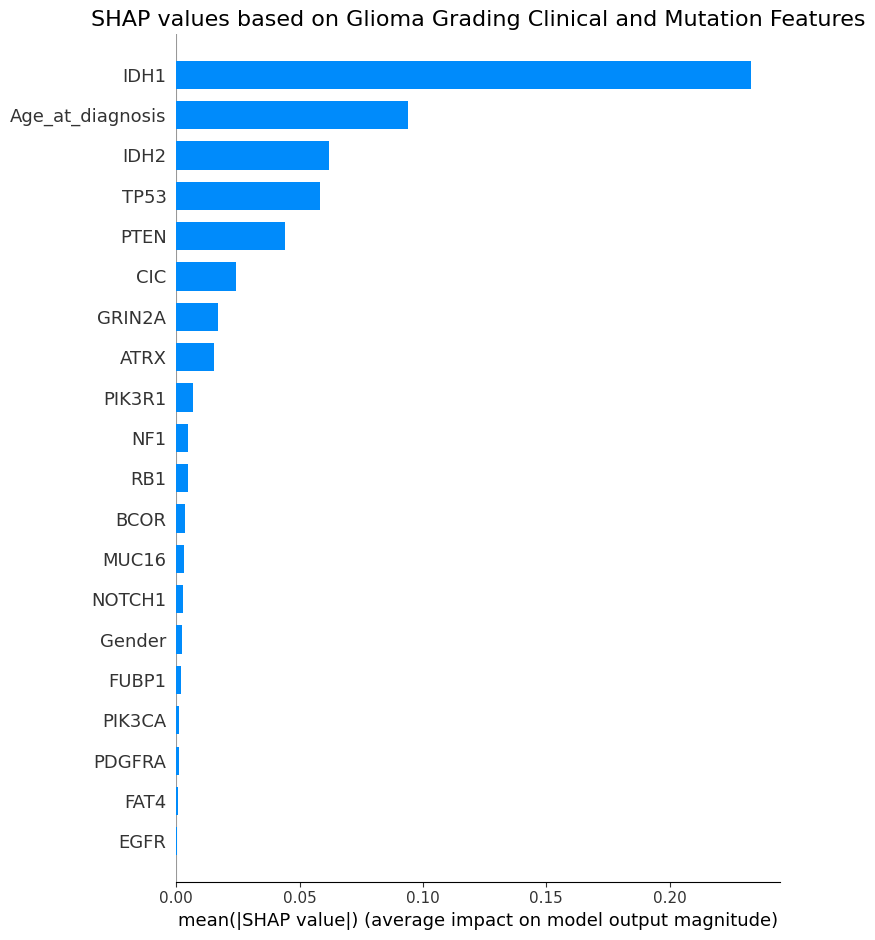

In [52]:
# First, let's verify our data shapes
print("SHAP values shape:", shap_values.shape)
print("X_test shape:", X_test[:5].shape)
print("Feature names length:", len(feature_names))

# Modify the plot code to use only the first class's SHAP values
plt.figure(figsize=(10, 12))
shap.summary_plot(
    shap_values=shap_values[:5,:,1],  # Take only first 5 samples, second class
    features=X_test[:5],
    feature_names=feature_names,
    plot_type="bar",
    show=False
)
plt.title("SHAP values based on Glioma Grading Clinical and Mutation Features", fontsize=16)
plt.tight_layout()
plt.show()

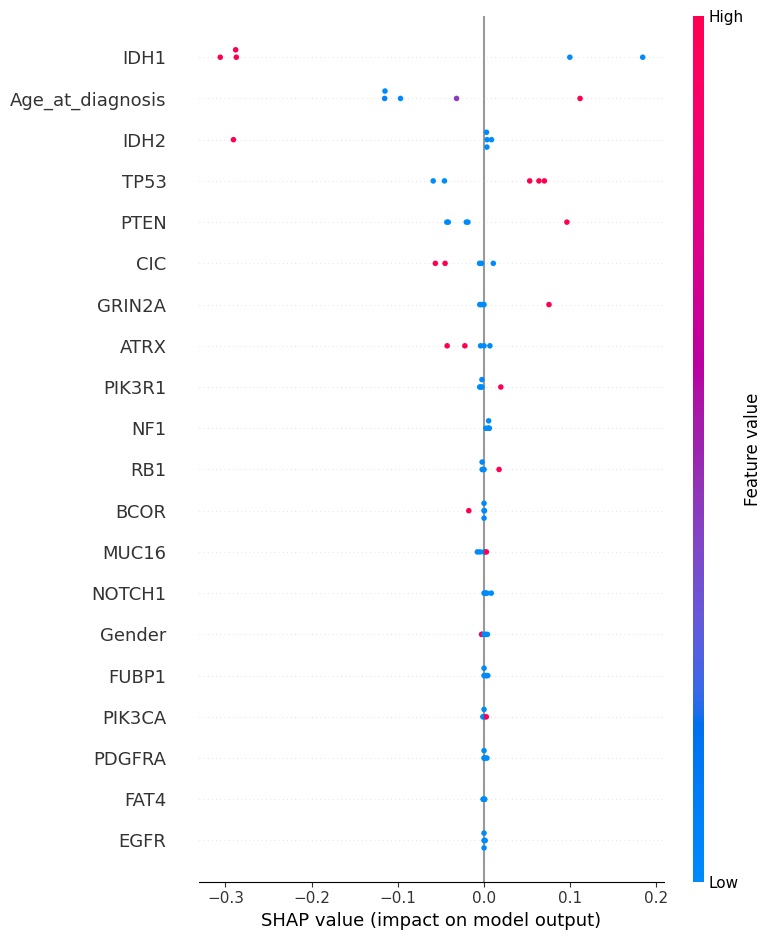

In [61]:
plt.figure(figsize=(10, 12))
shap.summary_plot(shap_values[:,:,1], X_test[:5], feature_names=feature_names, show=True)
#plt.title("SHAP values based on Glioma Grading Clinical and Mutation Features", fontsize=16)
#plt.tight_layout()
plt.show()


This SHAP summary plot provides valuable insights into how different features impact the glioma grading model's predictions:

1. Most Influential Features:
- IDH1 shows the strongest impact, with high values (red) strongly associated with one class and low values (blue) with the other
- Age_at_diagnosis is the second most important feature, with higher ages generally having a negative impact on the prediction
- IDH2 and TP53 mutations also show significant influence

2. Clinical vs Molecular Features:
- Both types of features are important:
  - Clinical: Age_at_diagnosis is a key predictor
  - Molecular: IDH1, IDH2, TP53, and PTEN mutations are strong predictors

3. Feature Impact Direction:
- Some features like IDH1 show clear bidirectional effects (both positive and negative impacts)
- Others like EGFR, FAT4, and PDGFRA show minimal impact on predictions

4. Feature Value Distribution:
- The color distribution shows how feature values (low=blue to high=red) affect predictions
- Scattered points indicate individual sample impacts
- The spread of points shows the variation in feature effects across samples

This visualization suggests that the model relies heavily on established biological markers (especially IDH1 status) and clinical factors (age) for glioma grading, which aligns with current medical knowledge about glioma classification.


### Classification of Bonn EEG data [[link](https://www.upf.edu/web/ntsa/downloads/-/asset_publisher/xvT6E4pczrBw/content/2001-indications-of-nonlinear-deterministic-and-finite-dimensional-structures-in-time-series-of-brain-electrical-activity-dependence-on-recording-regi)]


**[Bonn University EEG Dataset](https://www.upf.edu/web/ntsa/downloads/-/asset_publisher/xvT6E4pczrBw/content/2001-indications-of-nonlinear-deterministic-and-finite-dimensional-structures-in-time-series-of-brain-electrical-activity-dependence-on-recording-regi)**

- Paper: Andrzejak et al., Physical Review E, 2001;64:061907 [[link](https://www.upf.edu/documents/229517819/232450661/Andrzejak-PhysicalReviewE2001.pdf/0e9a54b8-8993-b400-743e-4d64fa29fb63)]
- Commonly used in epilepsy research
- Contains 5 sets (A-E) with 100 single-channel EEG segments each
- Sets A and B are from healthy subjects
- Sets C, D, and E are from patients with epilepsy
- Freely available and well-documented
- Perfect for starting out due to its manageable size

To use the code provided below:

1. Download the Bonn dataset
2. Create a directory structure as shown in the comments
3. Place the normal EEG files in 'setA' and seizure EEG files in 'setE'

You could:

- Modify the code for a different EEG dataset?
- Add specific EEG preprocessing steps?
- Implement additional EEG-specific features?

**References**


[1]\. The Bonn EEG time series download page \- UPF, accessed January 15, 2025, [https://www.upf.edu/web/ntsa/downloads/-/asset\_publisher/xvT6E4pczrBw/content/2001-indications-of-nonlinear-deterministic-and-finite-dimensional-structures-in-time-series-of-brain-electrical-activity-dependence-on-recording-regi](https://www.upf.edu/web/ntsa/downloads/-/asset_publisher/xvT6E4pczrBw/content/2001-indications-of-nonlinear-deterministic-and-finite-dimensional-structures-in-time-series-of-brain-electrical-activity-dependence-on-recording-regi)  
[2]\. benfulcher/hctsaTutorial\_BonnEEG: hctsa tutorial using the five-class Bonn EEG dataset, accessed January 15, 2025, [https://github.com/benfulcher/hctsaTutorial\_BonnEEG](https://github.com/benfulcher/hctsaTutorial_BonnEEG)

In [20]:
# If colab, we have to fetch recorded EEG data and put it in the bonn_eeg_data folder
if is_colab:
    # Create directories
    !mkdir -p bonn_eeg_data/setA bonn_eeg_data/setE
    
    # Download and extract normal EEG data (Set A)
    !wget -O bonn_eeg_data/setA.zip https://raw.githubusercontent.com/MMIV-ML/ELMED219-2025/main/Lab2-DL/notebooks/bonn_eeg_data/setA.zip
    !unzip -j bonn_eeg_data/setA.zip -d bonn_eeg_data/setA/
    !rm bonn_eeg_data/setA.zip
    
    # Download and extract seizure EEG data (Set E)
    !wget -O bonn_eeg_data/setE.zip https://raw.githubusercontent.com/MMIV-ML/ELMED219-2025/main/Lab2-DL/notebooks/bonn_eeg_data/setE.zip
    !unzip -j bonn_eeg_data/setE
    !rm bonn_eeg_data/setE.zip   

# Verify data structure
data_dir='bonn_eeg_data'
required_dirs = ['setA', 'setE']
for subdir in required_dirs:
    if not os.path.exists(os.path.join(data_dir, subdir)):
        print(f"Error: Missing {subdir} directory")
    else:
        print(f"Directory {subdir} exists")

dataset_name = 'Bonn EEG data'

Directory setA exists
Directory setE exists


In [41]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

def load_bonn_eeg_data(data_dir='bonn_eeg_data', n_samples=500):
    """
    Load Bonn EEG dataset from specified directory structure.
    
    Expected structure:
    bonn_eeg_data/
    ├── setA/  # normal EEG
    │   ├── Z001.txt
    │   └── ...
    └── setE/  # seizure EEG
        ├── S001.txt
        └── ...
    
    Limitation on number of features in TabPFN (500)

    Returns:
    --------
    X : numpy array
        Features (EEG signals)
    y : numpy array
        Labels (0: normal, 1: seizure)
    """
    
    # Check if directory exists
    if not os.path.exists(data_dir):
        raise FileNotFoundError(f"Directory {data_dir} not found")
    
    # Initialize lists to store data
    X = []
    y = []
    
    # Load normal EEG data (setA)
    normal_dir = os.path.join(data_dir, 'setA')
    if os.path.exists(normal_dir):
        for file in sorted(os.listdir(normal_dir)):
            if file.endswith('.txt'):
                file_path = os.path.join(normal_dir, file)
                # Load EEG signal and take first n_samples
                signal = np.loadtxt(file_path)[:n_samples]
                X.append(signal)
                y.append(0)  # Label 0 for normal
    
    # Load seizure EEG data (setE)
    seizure_dir = os.path.join(data_dir, 'setE')
    if os.path.exists(seizure_dir):
        for file in sorted(os.listdir(seizure_dir)):
            if file.endswith('.txt'):
                file_path = os.path.join(seizure_dir, file)
                # Load EEG signal and take first n_samples
                signal = np.loadtxt(file_path)[:n_samples]
                X.append(signal)
                y.append(1)  # Label 1 for seizure
    
    # Convert to numpy arrays
    X = np.array(X)
    y = np.array(y)
    
    print(f"Dataset loaded successfully:")
    print(f"Total samples: {len(X)}")
    print(f"Normal samples: {np.sum(y == 0)}")
    print(f"Seizure samples: {np.sum(y == 1)}")
    print(f"Signal length: {X.shape[1]} points")
    
    return X, y


# Example usage:
if __name__ == "__main__":
    # Load the data
    X, y = load_bonn_eeg_data()
    
    # Split into train/test sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, 
        test_size=0.2, 
        random_state=42,
        stratify=y
    )
    
    print("\nData split complete:")
    print(f"Training set shape: {X_train.shape}")
    print(f"Test set shape: {X_test.shape}")
    # Number of classes in train and test set
    print(f"Number of classes in train set: {len(np.unique(y_train))}")
    print(f"Number of classes in test set: {len(np.unique(y_test))}")
    # Distribution of classes in train and test set
    print(f"Class distribution in train set:")
    print(f"Class distribution in test set:")
    print(y_test)

Dataset loaded successfully:
Total samples: 200
Normal samples: 100
Seizure samples: 100
Signal length: 500 points

Data split complete:
Training set shape: (160, 500)
Test set shape: (40, 500)
Number of classes in train set: 2
Number of classes in test set: 2
Class distribution in train set:
Class distribution in test set:
[0 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 0 0 1 0 1 1 1 1 1 1 0 1 0 1 0 0 0 0 0 0
 0 1 0]


In [42]:
# Explain the data and show examples

# Print dataset info
print(f"Dataset: {dataset_name}")
print(f"Dataset shape: {X.shape}")
print(f"Number of classes: {len(np.unique(y))}")
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

# Since X is a numpy array, we can't access columns directly
# Instead, we can create generic feature names if needed
feature_names = [f"EEG_{i+1:04d}" for i in range(X.shape[1])]
print("\nFeature names:")
print(f"['{feature_names[0]}', '{feature_names[1]}', '{feature_names[2]}', ..., '{feature_names[-1]}']")

Dataset: Bonn EEG data
Dataset shape: (200, 500)
Number of classes: 2
Training set shape: (160, 500)
Test set shape: (40, 500)

Feature names:
['EEG_0001', 'EEG_0002', 'EEG_0003', ..., 'EEG_0500']


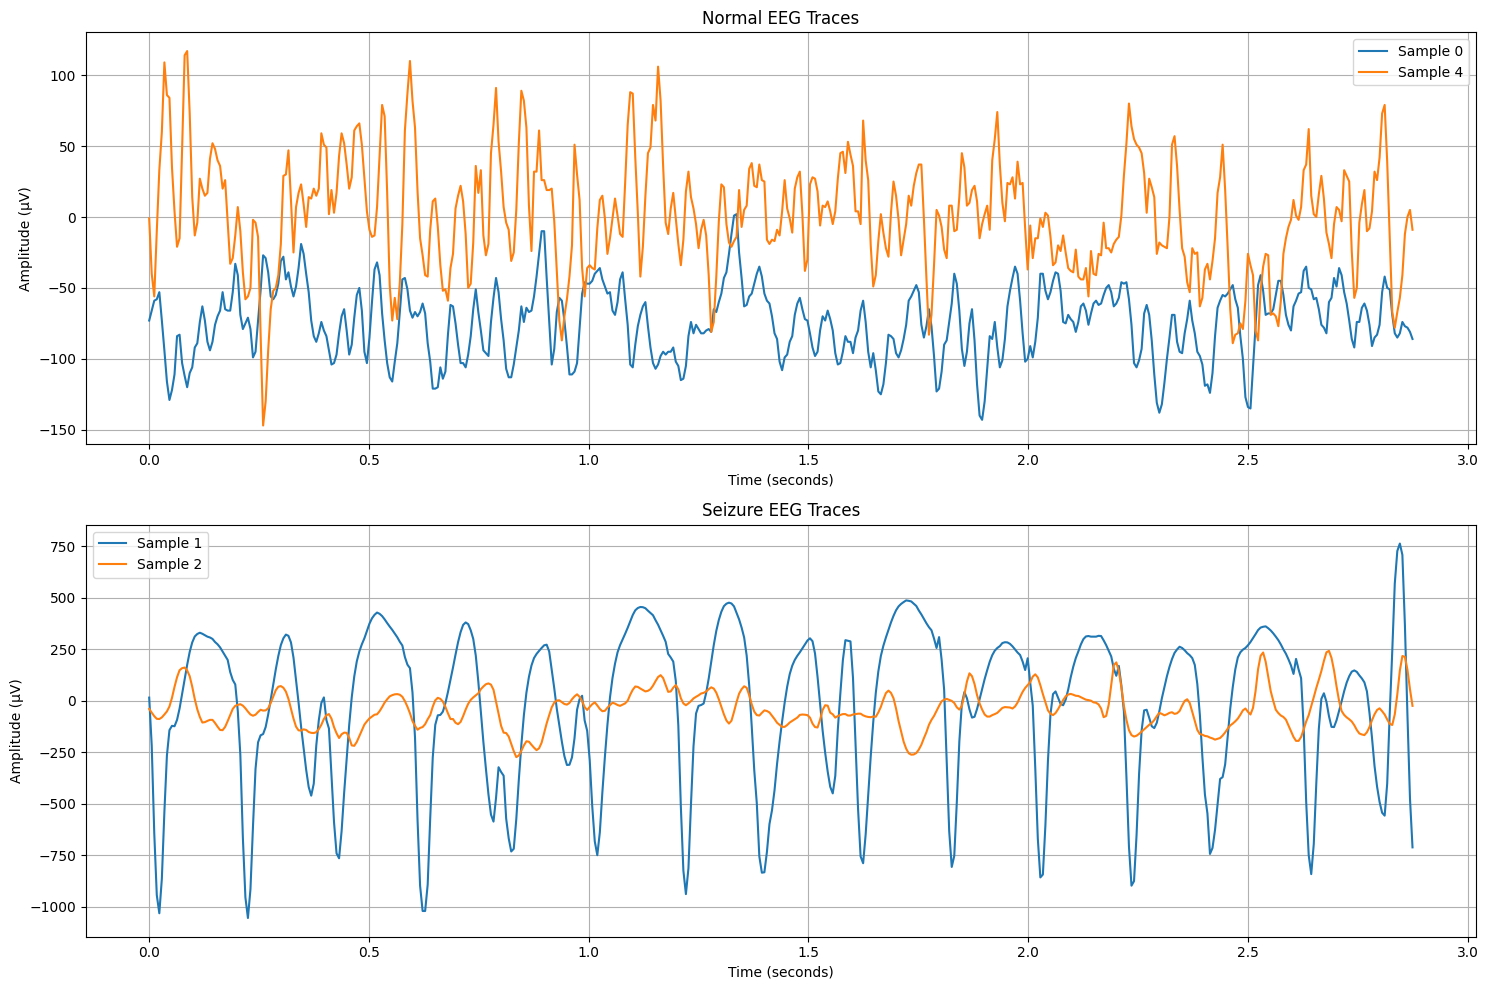

In [44]:
# Plot 3 EEG traces that are Normal and 3 that are Seizure from the test set

def plot_eeg_samples(X_test, y_test, n_samples=2):
    """
    Plot n_samples of normal and seizure EEG traces from test set
    """
    # Create time axis (assuming sampling rate of 173.61 Hz as per Bonn dataset)
    # time = np.arange(0, 23.6, 23.6/4097)  # 0 to 23.6 seconds
    sampling_rate = 173.61  # Hz
    no_samples = 500
    duration = no_samples / sampling_rate
    time = np.arange(0, duration, duration/no_samples)
    
    # Get indices for normal and seizure samples
    normal_idx = np.where(y_test == 0)[0][:n_samples]
    seizure_idx = np.where(y_test == 1)[0][:n_samples]
    
    # Create subplot
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))
    
    # Plot normal EEG traces
    for idx in normal_idx:
        ax1.plot(time, X_test[idx], label=f'Sample {idx}')
    ax1.set_title('Normal EEG Traces')
    ax1.set_xlabel('Time (seconds)')
    ax1.set_ylabel('Amplitude (µV)')
    ax1.legend()
    ax1.grid(True)
    
    # Plot seizure EEG traces
    for idx in seizure_idx:
        ax2.plot(time, X_test[idx], label=f'Sample {idx}')
    ax2.set_title('Seizure EEG Traces')
    ax2.set_xlabel('Time (seconds)')
    ax2.set_ylabel('Amplitude (µV)')
    ax2.legend()
    ax2.grid(True)
    
    plt.tight_layout()
    plt.show()

# Plot the samples
plot_eeg_samples(X_test, y_test)


In [45]:
%%time
# Train and evaluate TabPFN
classifier = TabPFNClassifier(random_state=42) # , ignore_pretraining_limits=True) if more that 500 samples
classifier.fit(X_train, y_train)
y_pred = classifier.predict_proba(X_test)

# Calculate ROC AUC with multiclass handling
if len(np.unique(y)) > 2:
    # For multiclass ROC AUC, use 'ovr' (one-vs-rest) approach
    score = roc_auc_score(y_test, y_pred, multi_class='ovr', average='macro')
else:
    # For binary classification
    score = roc_auc_score(y_test, y_pred[:, 1])

print(f"TabPFN ROC AUC: {score:.4f}")

# Also print accuracy for easier interpretation when using multiclass
accuracy = accuracy_score(y_test, classifier.predict(X_test))
print(f"TabPFN Accuracy: {accuracy:.4f}")

# Print confusion matrix
from sklearn.metrics import confusion_matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, classifier.predict(X_test)))

TabPFN ROC AUC: 1.0000
TabPFN Accuracy: 1.0000

Confusion Matrix:
[[20  0]
 [ 0 20]]
CPU times: user 4.42 s, sys: 2.37 s, total: 6.8 s
Wall time: 2.23 s


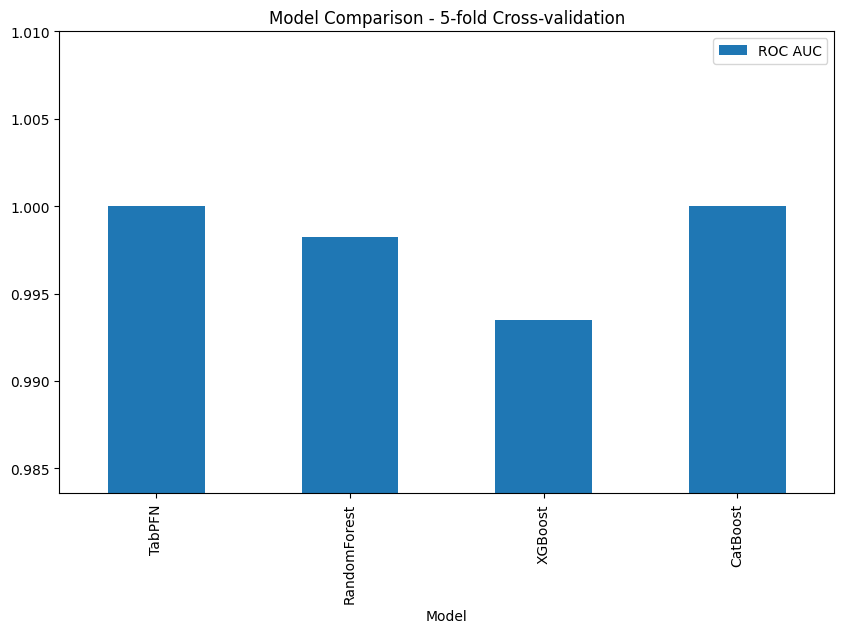

In [49]:
# Compare different machine learning models by training each one multiple times
# on different parts of the data and averaging their performance scores for a
# more reliable performance estimate

# Define models
models = [
    ('TabPFN', TabPFNClassifier(random_state=42)),
    ('RandomForest', RandomForestClassifier(random_state=42)),
    ('XGBoost', XGBClassifier(random_state=42)),
    ('CatBoost', CatBoostClassifier(random_state=42, verbose=0))
]

# Calculate scores
scoring = 'roc_auc_ovr' if len(np.unique(y)) > 2 else 'roc_auc'
scores = {name: cross_val_score(model, X, y, cv=5, scoring=scoring, n_jobs=1, verbose=1).mean()
          for name, model in models}

# Plot results
df = pd.DataFrame(list(scores.items()), columns=['Model', 'ROC AUC'])
ax = df.plot(x='Model', y='ROC AUC', kind='bar', figsize=(10, 6))
ax.set_ylim(df['ROC AUC'].min() * 0.99, df['ROC AUC'].max() * 1.01)
ax.set_title('Model Comparison - 5-fold Cross-validation')

plt.show()
# Plot other performance metrics for each of the classifiers


## SHAP

PermutationExplainer explainer: 51it [00:54,  1.30s/it]                        

Computing shap values for the first class (index 0).


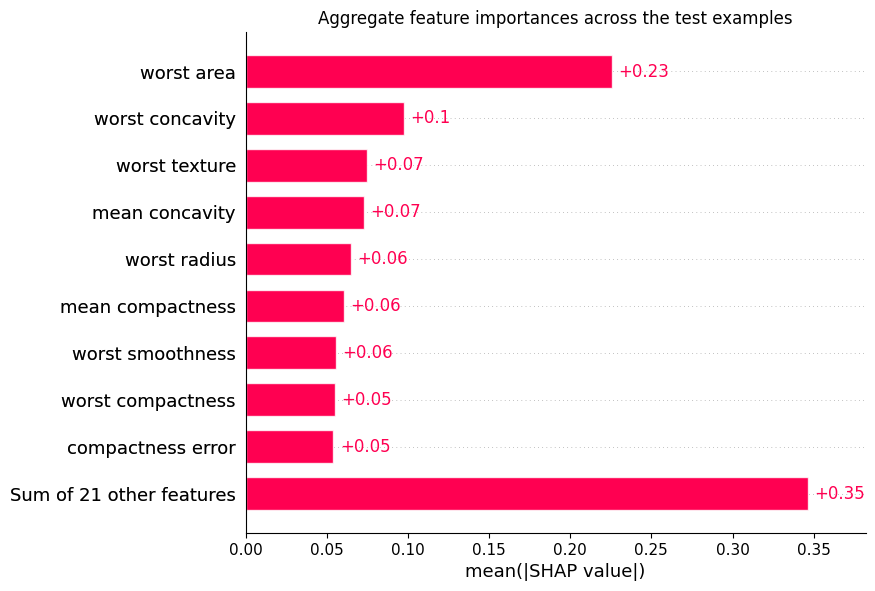

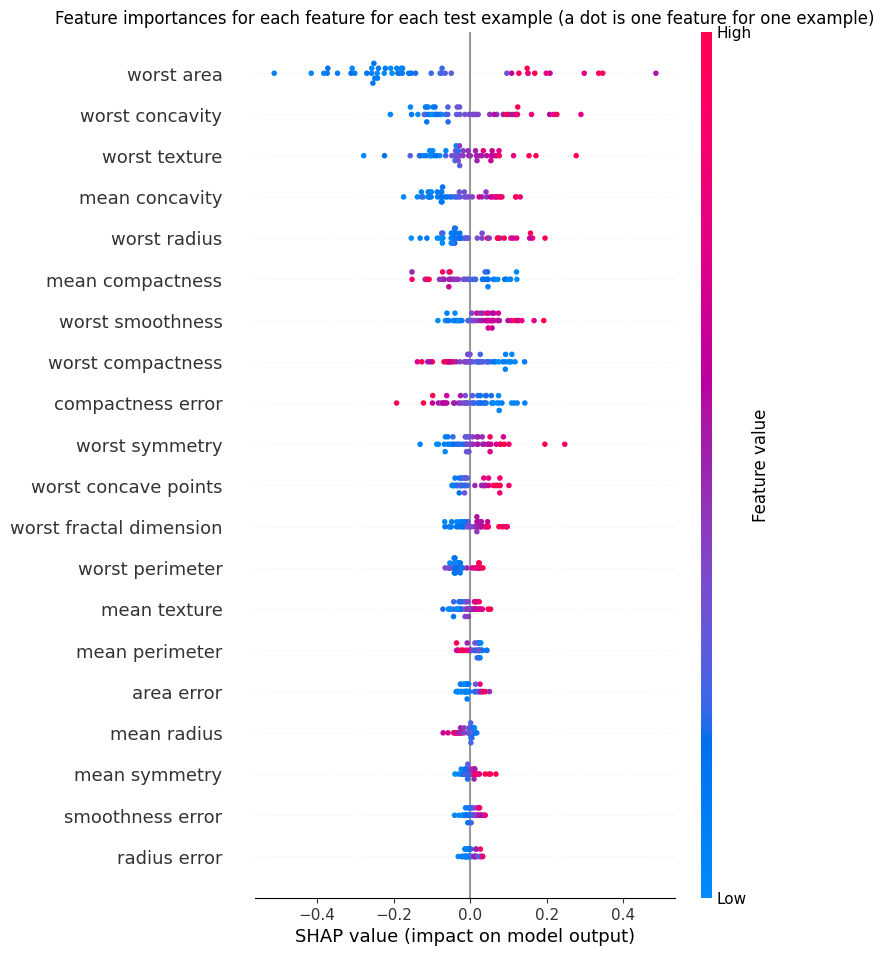

Now we analyze the strongest feature interactions of the most important feature, namely the feature "23".


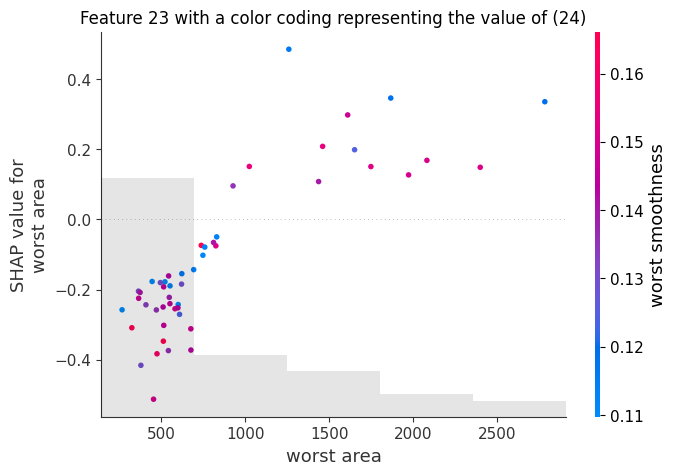

In [39]:
from tabpfn_extensions import interpretability

# Load example dataset
data = load_breast_cancer()
X, y = data.data, data.target
feature_names = data.feature_names
n_samples = 50

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5
)

# Initialize and train model
clf = TabPFNClassifier()
clf.fit(X_train, y_train)

# Calculate SHAP values
shap_values = interpretability.shap.get_shap_values(
    estimator=clf,
    test_x=X_test[:n_samples],
    attribute_names=feature_names,
    algorithm="permutation",
)

# Create visualization
fig = interpretability.shap.plot_shap(shap_values)


## Feature selection

In [26]:
%%time
from tabpfn_extensions import interpretability

# Load data
data = load_breast_cancer()
X, y = data.data, data.target
feature_names = data.feature_names

# Initialize model
clf = TabPFNClassifier(n_estimators=3)

# Feature selection
sfs = interpretability.feature_selection.feature_selection(
    estimator=clf,
    X=X,
    y=y,
    n_features_to_select=5,
    feature_names=feature_names
)

# Print selected features
selected_features = [feature_names[i] for i in range(len(feature_names)) if sfs.get_support()[i]]
print("\nSelected features:")
for feature in selected_features:
    print(f"- {feature}")

Score with all features: 0.9806707033069401 +/- 0.00655630132909533
Score with selected features: 0.98067070330694 +/- 0.008588584764482985
Features selected by forward sequential selection: ['symmetry error', 'worst radius', 'worst texture', 'worst perimeter', 'worst smoothness']

Selected features:
- symmetry error
- worst radius
- worst texture
- worst perimeter
- worst smoothness
CPU times: user 5min 14s, sys: 9.72 s, total: 5min 23s
Wall time: 1min 31s


# Unsupervised

## Data Generation / Outlier Detection

100%|██████████| 3/3 [00:02<00:00,  1.17it/s]


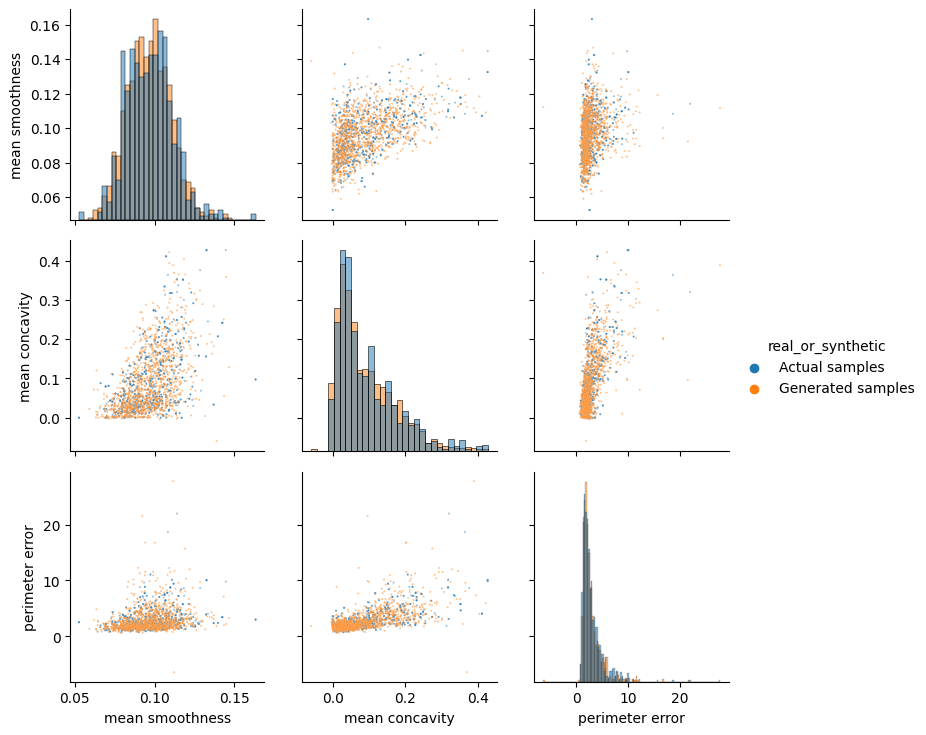

In [30]:
from tabpfn_extensions import unsupervised

# Load and prepare breast cancer dataset
df = load_breast_cancer(return_X_y=False)
X, y = df['data'], df['target']
feature_names = df['feature_names']

# Initialize TabPFN models
model_unsupervised = unsupervised.TabPFNUnsupervisedModel(
    tabpfn_clf=TabPFNClassifier(),
    tabpfn_reg=TabPFNRegressor()
)

# Select features for synthetic data generation
# Example features: [mean texture, mean area, mean concavity]
feature_indices = [4, 6, 12]

# Run synthetic data generation experiment
experiment = unsupervised.experiments.GenerateSyntheticDataExperiment(
    task_type='unsupervised'
)

results = experiment.run(
    tabpfn=model_unsupervised,
    X=torch.tensor(X),
    y=torch.tensor(y),
    attribute_names=feature_names,
    temp=1.0,  # Temperature parameter for sampling
    n_samples=X.shape[0] * 2,  # Generate twice as many samples as original data
    indices=feature_indices
)

## Outlier detection

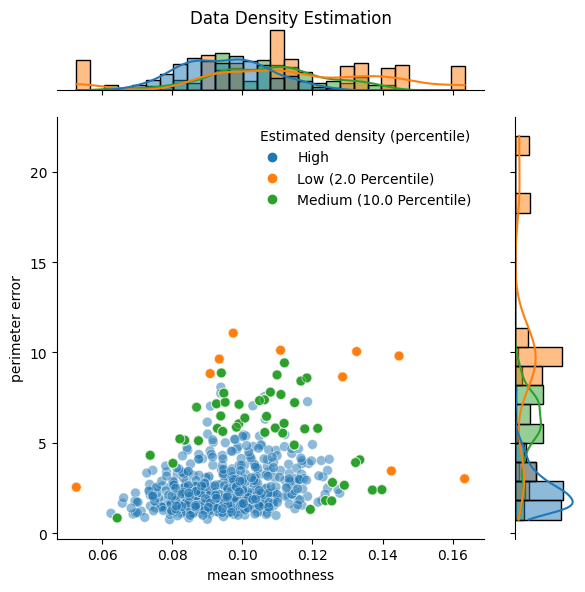

In [31]:
import torch
from sklearn.datasets import load_breast_cancer
from tabpfn_extensions import unsupervised
from tabpfn_extensions import TabPFNClassifier, TabPFNRegressor

# Load data
df = load_breast_cancer(return_X_y=False)
X, y = df["data"], df["target"]
attribute_names = df["feature_names"]

# Initialize models
clf = TabPFNClassifier(n_estimators=4)
reg = TabPFNRegressor(n_estimators=4)
model_unsupervised = unsupervised.TabPFNUnsupervisedModel(
    tabpfn_clf=clf, tabpfn_reg=reg
)

# Run outlier detection
exp_outlier = unsupervised.experiments.OutlierDetectionUnsupervisedExperiment(
    task_type="unsupervised"
)
results = exp_outlier.run(
    tabpfn=model_unsupervised,
    X=torch.tensor(X),
    y=torch.tensor(y),
    attribute_names=attribute_names,
    indices=[4, 12],  # Analyze features 4 and 12
)